In [25]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",strides=1,padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",strides=1,padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation="softmax"),
       
    ]
)

model.summary()


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 14, 14, 64)        256       
_______________________________________________

In [26]:
y_test.shape

(10000, 10)

In [27]:
x_train=x_train[:1000]
y_train=y_train[:1000]
batch_size = 128
epochs = 50
w_param=model.get_weights()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
file_name='validation_accuracy'
checkpoints=keras.callbacks.ModelCheckpoint(filepath=file_name,monitor='val_accuracy',save_best_only=True,verbose=0)
callback=[checkpoints]
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3,callbacks=callback)


Epoch 1/50
6/6 [==============================] - 3s 121ms/step - loss: 2.3792 - accuracy: 0.2086 - val_loss: 2.2884 - val_accuracy: 0.1400
INFO:tensorflow:Assets written to: validation_accuracy/assets
Epoch 2/50
6/6 [==============================] - 0s 75ms/step - loss: 1.4254 - accuracy: 0.5229 - val_loss: 2.3079 - val_accuracy: 0.2633
INFO:tensorflow:Assets written to: validation_accuracy/assets
Epoch 3/50
6/6 [==============================] - 0s 73ms/step - loss: 1.0927 - accuracy: 0.6714 - val_loss: 2.3528 - val_accuracy: 0.0867
Epoch 4/50
6/6 [==============================] - 0s 76ms/step - loss: 0.8791 - accuracy: 0.7671 - val_loss: 2.4122 - val_accuracy: 0.0867
Epoch 5/50
6/6 [==============================] - 0s 78ms/step - loss: 0.7463 - accuracy: 0.8214 - val_loss: 2.4711 - val_accuracy: 0.0867
Epoch 6/50
6/6 [==============================] - 0s 77ms/step - loss: 0.6803 - accuracy: 0.8400 - val_loss: 2.5351 - val_accuracy: 0.0867
Epoch 7/50
6/6 [=========================

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 4.187740325927734
Test accuracy: 0.11760000139474869


In [29]:
test_accuracy=[]
test_accuracy.append(score[1])



In [30]:
from sklearn.utils import resample
from scipy.stats import mode
n_ensemble=5
predictions=np.zeros((10000,n_ensemble))
for i in range(n_ensemble):
    model.set_weights(w_param)
    x_train,y_train=resample(x_train,y_train)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    file_name='validation_accuracy'
    checkpoints=keras.callbacks.ModelCheckpoint(filepath=file_name,monitor='val_accuracy',save_best_only=True,verbose=0)
    callback=[checkpoints]
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3,callbacks=callback)
    predictions[:,i]=(np.argmax(model.predict(x_test),axis=1))

predictions=np.array(mode(predictions,axis=1))
predictions=predictions[0,:,:]
test_accuracy.append(1-np.count_nonzero((np.argmax(y_test,axis=1)-predictions.T))/10000)

    


Epoch 1/50
6/6 [==============================] - 2s 114ms/step - loss: 2.2794 - accuracy: 0.2400 - val_loss: 2.2723 - val_accuracy: 0.1600
INFO:tensorflow:Assets written to: validation_accuracy/assets
Epoch 2/50
6/6 [==============================] - 0s 75ms/step - loss: 1.3595 - accuracy: 0.5529 - val_loss: 2.2681 - val_accuracy: 0.1300
Epoch 3/50
6/6 [==============================] - 0s 76ms/step - loss: 0.9690 - accuracy: 0.7186 - val_loss: 2.2812 - val_accuracy: 0.2100
INFO:tensorflow:Assets written to: validation_accuracy/assets
Epoch 4/50
6/6 [==============================] - 0s 76ms/step - loss: 0.7820 - accuracy: 0.8114 - val_loss: 2.3085 - val_accuracy: 0.1467
Epoch 5/50
6/6 [==============================] - 0s 78ms/step - loss: 0.6983 - accuracy: 0.8371 - val_loss: 2.3484 - val_accuracy: 0.1367
Epoch 6/50
6/6 [==============================] - 0s 79ms/step - loss: 0.5792 - accuracy: 0.8900 - val_loss: 2.3925 - val_accuracy: 0.1367
Epoch 7/50
6/6 [=========================

In [31]:
n_ensemble=10
predictions=np.zeros((10000,n_ensemble))
for i in range(n_ensemble):
    model.set_weights(w_param)
    x_train,y_train=resample(x_train,y_train)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    file_name='validation_accuracy'
    checkpoints=keras.callbacks.ModelCheckpoint(filepath=file_name,monitor='val_accuracy',save_best_only=True,verbose=0)
    callback=[checkpoints]
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3,callbacks=callback)
    predictions[:,i]=(np.argmax(model.predict(x_test),axis=1))

predictions=np.array(mode(predictions,axis=1))
predictions=predictions[0,:,:]
test_accuracy.append(1-np.count_nonzero((np.argmax(y_test,axis=1)-predictions.T))/10000)

    


Epoch 1/50
6/6 [==============================] - 1s 115ms/step - loss: 2.1008 - accuracy: 0.3086 - val_loss: 2.2794 - val_accuracy: 0.1467
INFO:tensorflow:Assets written to: validation_accuracy/assets
Epoch 2/50
6/6 [==============================] - 0s 78ms/step - loss: 1.0806 - accuracy: 0.7071 - val_loss: 2.2919 - val_accuracy: 0.1667
INFO:tensorflow:Assets written to: validation_accuracy/assets
Epoch 3/50
6/6 [==============================] - 0s 74ms/step - loss: 0.7888 - accuracy: 0.8043 - val_loss: 2.3182 - val_accuracy: 0.1433
Epoch 4/50
6/6 [==============================] - 0s 75ms/step - loss: 0.6017 - accuracy: 0.8871 - val_loss: 2.3553 - val_accuracy: 0.1000
Epoch 5/50
6/6 [==============================] - 0s 74ms/step - loss: 0.4861 - accuracy: 0.9200 - val_loss: 2.3975 - val_accuracy: 0.1000
Epoch 6/50
6/6 [==============================] - 0s 74ms/step - loss: 0.4035 - accuracy: 0.9543 - val_loss: 2.4484 - val_accuracy: 0.1000
Epoch 7/50
6/6 [=========================

In [32]:
n_ensemble=20
predictions=np.zeros((10000,n_ensemble))
for i in range(n_ensemble):
    model.set_weights(w_param)
    x_train,y_train=resample(x_train,y_train)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    file_name='validation_accuracy'
    checkpoints=keras.callbacks.ModelCheckpoint(filepath=file_name,monitor='val_accuracy',save_best_only=True,verbose=0)
    callback=[checkpoints]
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3,callbacks=callback)
    model.load_weights(file_name)
    predictions[:,i]=(np.argmax(model.predict(x_test),axis=1))

predictions=np.array(mode(predictions,axis=1))
predictions=predictions[0,:,:]
test_accuracy.append(1-np.count_nonzero((np.argmax(y_test,axis=1)-predictions.T))/10000)


Epoch 1/50
6/6 [==============================] - 1s 111ms/step - loss: 1.8447 - accuracy: 0.4300 - val_loss: 2.2767 - val_accuracy: 0.1867
INFO:tensorflow:Assets written to: validation_accuracy/assets
Epoch 2/50
6/6 [==============================] - 0s 75ms/step - loss: 0.7874 - accuracy: 0.8271 - val_loss: 2.2775 - val_accuracy: 0.0900
Epoch 3/50
6/6 [==============================] - 0s 76ms/step - loss: 0.5337 - accuracy: 0.9071 - val_loss: 2.3018 - val_accuracy: 0.1767
Epoch 4/50
6/6 [==============================] - 0s 79ms/step - loss: 0.3923 - accuracy: 0.9657 - val_loss: 2.3362 - val_accuracy: 0.1400
Epoch 5/50
6/6 [==============================] - 0s 75ms/step - loss: 0.3395 - accuracy: 0.9714 - val_loss: 2.3781 - val_accuracy: 0.1167
Epoch 6/50
6/6 [==============================] - 0s 74ms/step - loss: 0.2722 - accuracy: 0.9843 - val_loss: 2.4237 - val_accuracy: 0.1067
Epoch 7/50
6/6 [==============================] - 0s 73ms/step - loss: 0.2366 - accuracy: 0.9886 - val_

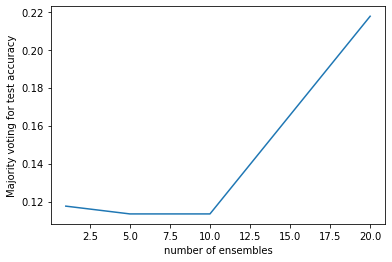

In [33]:
import matplotlib.pyplot as plt
n_ensembles=[1,5,10,20]
plt.plot(n_ensembles,test_accuracy)
plt.xlabel('number of ensembles')
plt.ylabel('Majority voting for test accuracy')
plt.show()
    

In [34]:
test_accuracy

[0.11760000139474869,
 0.11350000000000005,
 0.11350000000000005,
 0.21760000000000002]

PROBLEM 2:

In [35]:
(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=5000)
x_train=keras.preprocessing.sequence.pad_sequences(x_train,maxlen=500)
x_test=keras.preprocessing.sequence.pad_sequences(x_test,maxlen=500)
batch_size=128
epochs=10
table=np.zeros((4,3))
LSTM_layers=[16,32,64,128]

In [36]:
for i in range(4):
    model=keras.Sequential()
    model.add(layers.Embedding(5000,8))
    model.add(layers.LSTM(LSTM_layers[i]))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
    score=model.evaluate(x_test,y_test,verbose=0)
    table[i,0]=score[1]

Epoch 1/10
196/196 [==============================] - 22s 108ms/step - loss: 0.5586 - accuracy: 0.7113
Epoch 2/10
196/196 [==============================] - 22s 113ms/step - loss: 0.3025 - accuracy: 0.8814
Epoch 3/10
196/196 [==============================] - 23s 117ms/step - loss: 0.2636 - accuracy: 0.9000
Epoch 4/10
196/196 [==============================] - 21s 109ms/step - loss: 0.2207 - accuracy: 0.9165
Epoch 5/10
196/196 [==============================] - 21s 110ms/step - loss: 0.1956 - accuracy: 0.9277
Epoch 6/10
196/196 [==============================] - 22s 110ms/step - loss: 0.1754 - accuracy: 0.9374
Epoch 7/10
196/196 [==============================] - 21s 109ms/step - loss: 0.1621 - accuracy: 0.9418
Epoch 8/10
196/196 [==============================] - 22s 111ms/step - loss: 0.1510 - accuracy: 0.9476
Epoch 9/10
196/196 [==============================] - 22s 110ms/step - loss: 0.1449 - accuracy: 0.9489
Epoch 10/10
196/196 [==============================] - 21s 110ms/step - l

In [37]:
for i in range(4):
    model=keras.Sequential()
    model.add(layers.Embedding(5000,16))
    model.add(layers.LSTM(LSTM_layers[i]))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
    score=model.evaluate(x_test,y_test,verbose=0)
    table[i,1]=score[1]

Epoch 1/10
196/196 [==============================] - 29s 131ms/step - loss: 0.5858 - accuracy: 0.6954
Epoch 2/10
196/196 [==============================] - 24s 124ms/step - loss: 0.3761 - accuracy: 0.8479
Epoch 3/10
196/196 [==============================] - 25s 126ms/step - loss: 0.2930 - accuracy: 0.8852
Epoch 4/10
196/196 [==============================] - 25s 129ms/step - loss: 0.2362 - accuracy: 0.9102
Epoch 5/10
196/196 [==============================] - 24s 121ms/step - loss: 0.2058 - accuracy: 0.9244
Epoch 6/10
196/196 [==============================] - 24s 123ms/step - loss: 0.1834 - accuracy: 0.9347
Epoch 7/10
196/196 [==============================] - 23s 120ms/step - loss: 0.1635 - accuracy: 0.9432
Epoch 8/10
196/196 [==============================] - 23s 119ms/step - loss: 0.1542 - accuracy: 0.9451
Epoch 9/10
196/196 [==============================] - 24s 121ms/step - loss: 0.1408 - accuracy: 0.9520
Epoch 10/10
196/196 [==============================] - 23s 118ms/step - l

In [38]:
for i in range(4):
    model=keras.Sequential()
    model.add(layers.Embedding(5000,32))
    model.add(layers.LSTM(LSTM_layers[i]))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")
    model.fit(x_train, y_train, batch_size=batch_size, epochs=12)
    score=model.evaluate(x_test,y_test,verbose=0)
    table[i,2]=score[1]

Epoch 1/12
196/196 [==============================] - 26s 125ms/step - loss: 0.5012 - accuracy: 0.7597
Epoch 2/12
196/196 [==============================] - 25s 129ms/step - loss: 0.2773 - accuracy: 0.8911
Epoch 3/12
196/196 [==============================] - 27s 138ms/step - loss: 0.2291 - accuracy: 0.9143
Epoch 4/12
196/196 [==============================] - 28s 142ms/step - loss: 0.1956 - accuracy: 0.9286
Epoch 5/12
196/196 [==============================] - 26s 134ms/step - loss: 0.1742 - accuracy: 0.9374
Epoch 6/12
196/196 [==============================] - 24s 122ms/step - loss: 0.1575 - accuracy: 0.9434
Epoch 7/12
196/196 [==============================] - 25s 126ms/step - loss: 0.1403 - accuracy: 0.9520
Epoch 8/12
196/196 [==============================] - 23s 117ms/step - loss: 0.1311 - accuracy: 0.9558
Epoch 9/12
196/196 [==============================] - 24s 125ms/step - loss: 0.1182 - accuracy: 0.9603
Epoch 10/12
196/196 [==============================] - 25s 128ms/step - l

In [39]:
from tabulate import tabulate
print(tabulate({'#of hidden states': [16, 32,64,128], '8': [table[0,0], table[1,0], table[2,0], table[3,0]], '16': [table[0,1], table[1,1], table[2,1], table[3,1]], '32': [table[0,2], table[1,2], table[2,2], table[3,2]]}, headers="keys", tablefmt='fancy_grid'))


╒═════════════════════╤═════════╤═════════╤═════════╕
│   #of hidden states │       8 │      16 │      32 │
╞═════════════════════╪═════════╪═════════╪═════════╡
│                  16 │ 0.87016 │ 0.85032 │ 0.8618  │
├─────────────────────┼─────────┼─────────┼─────────┤
│                  32 │ 0.83592 │ 0.86684 │ 0.86712 │
├─────────────────────┼─────────┼─────────┼─────────┤
│                  64 │ 0.86956 │ 0.86096 │ 0.86308 │
├─────────────────────┼─────────┼─────────┼─────────┤
│                 128 │ 0.87252 │ 0.86508 │ 0.84504 │
╘═════════════════════╧═════════╧═════════╧═════════╛


PROBLEM3:

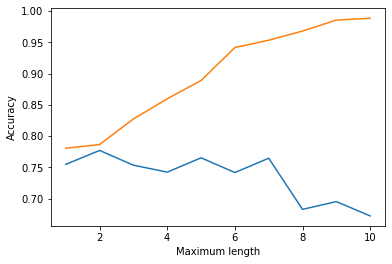

In [44]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('diabetes_datset.csv')
data=np.array(data)
x_data=data[:,:7]
y_data=data[:,8]

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)


maximum_length=list(range(1,11))
val_score=[]
train_accuracy=[]
for i in range(10):
    tree_model=tree.DecisionTreeClassifier(max_depth=maximum_length[i]).fit(x_train,y_train)
    train_accuracy.append(tree_model.score(x_train,y_train))
    val_score.append(cross_val_score(tree_model,x_val,y_val,cv=5, scoring='accuracy').mean())

plt.plot(maximum_length, val_score, label = 'Validation dataset Accuracy')
plt.plot(maximum_length, train_accuracy, label = 'Training dataset Accuracy')

plt.xlabel('Maximum length')
plt.ylabel('Accuracy')
plt.show()   


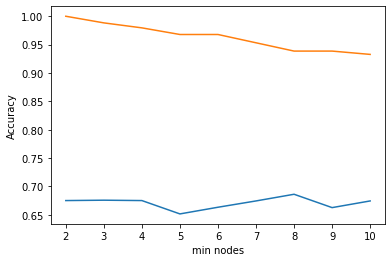

In [43]:

min_samples_split=list(range(2,11))
val_score=[]
train_accuracy=[]
for i in range(9):
    tree_model=tree.DecisionTreeClassifier(min_samples_split=min_samples_split[i]).fit(x_train,y_train)
    train_accuracy.append(tree_model.score(x_train,y_train))
    val_score.append(cross_val_score(tree_model,x_val,y_val,cv=5, scoring='accuracy').mean())

plt.plot(min_samples_split, val_score, label = 'Validation dataset Accuracy')
plt.plot(min_samples_split, train_accuracy, label = 'Training dataset Accuracy')

plt.xlabel('min nodes')
plt.ylabel('Accuracy')
plt.show()   

In [45]:
tree_model=tree.DecisionTreeClassifier(max_depth=2,min_samples_split=8).fit(x_train,y_train)
a=cross_val_score(tree_model,x_val,y_val,cv=5, scoring='accuracy').mean()
print('Validation accuracy',a)

Validation accuracy 0.8006535947712419


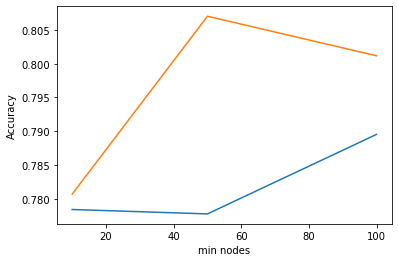

In [50]:
from sklearn.ensemble import RandomForestClassifier
n_estimators=[10,50,100]
val_score=[]
train_accuracy=[]
for i in range(3):
    forest_model= RandomForestClassifier(n_estimators=n_estimators[i],max_depth=2,min_samples_split=8).fit(x_train,y_train)
    train_accuracy.append(forest_model.score(x_train,y_train))
    val_score.append(cross_val_score(forest_model,x_val,y_val,cv=5, scoring='accuracy').mean())

    
plt.plot(n_estimators, val_score, label = 'Validation dataset Accuracy')
plt.plot(n_estimators, train_accuracy, label = 'Training dataset Accuracy')

plt.xlabel('min nodes')
plt.ylabel('Accuracy')
plt.show()     


In [51]:
forest_model=RandomForestClassifier(n_estimators=100,max_depth=2,min_samples_split=8).fit(x_train,y_train)
b=cross_val_score(forest_model,x_val,y_val,cv=5, scoring='accuracy').mean()
print('Validation accuracy',b)

Validation accuracy 0.7777777777777779
